In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from dataframe_manip import get_building_accesspoints,csv_to_dataframe

In [42]:
def get_building_df(building_name,df):
    building_ap = []
    building_ap = get_building_accesspoints(df.columns, building_name)

    # Create a Dataframe to help shape the final dataframe
    building_df = []
    building_df = pd.DataFrame(columns = ['month','day','hour','total']+building_ap)
    
    # Populate building_df
    building_df['month'] = pd.to_datetime(
        df['time'],
        infer_datetime_format=True,
        utc=True
    ).dt.strftime('%b')#.astype(np.float) #%m

    building_df['day'] = pd.to_datetime(
        df['time'],
        infer_datetime_format=True,
        utc=True
    ).dt.strftime('%a')#.astype(np.float) #%w

    building_df['hour'] = pd.to_datetime(
        df['time'],
        infer_datetime_format=True,
        utc=True
    ).dt.strftime('%H').astype(np.float)

    building_df[building_ap] = df[building_ap].fillna(0)
    building_df['total'] = building_df[building_ap].sum(axis=1)
    
    building_df_by_all = []
    building_df_by_all = building_df.groupby(['month','day','hour']).mean()
    
    final_df = []
    # Creates an empty DataFrame foor scatterplot
    final_df = pd.DataFrame(
        columns = ['month','day','hour','building_name','average_total']
    )

    final_df['month'] = building_df_by_all.index.get_level_values(0)
    final_df['day'] = building_df_by_all.index.get_level_values(1)
    final_df['hour'] = building_df_by_all.index.get_level_values(2)
    final_df['building_name'] = [building_name]*len(final_df['month'])
    final_df['total'] = list(building_df_by_all['total'])
    
    
    # Lists to help order plots
    order_day = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    order_mon = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep","Oct","Nov","Dec"]

    # Create 1x3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,8))

    ax2.set_title(building_name,fontsize=50) #################

    sns.barplot(x="day", y="total", data=final_df, ax=ax1, order=order_day)

    sns.barplot(x="hour", y="total", data=final_df, ax=ax2)
    plt.setp(ax2.get_xticklabels(), rotation=45)
    ax2.set_ylabel("")  # remove y label, but keep ticks

    sns.barplot(x="month", y="total", data=final_df, ax=ax3, order=order_mon)
    ax3.set_ylabel("")  # remove y label, but keep ticks

    fig.tight_layout()

    plt.show()
    
    

In [44]:
# Get data from csv  file; Try not to modify it!!!
wifi_df = pd.read_csv('wifi_data_until_20190204.csv',
                      infer_datetime_format=True,
                      index_col=False)

In [55]:
sorted(list(wifi_df.columns))

['POM- POMONA-B110-AP205-4',
 'POM-118-8TH-AP135-12',
 'POM-1567TH-AP105-1',
 'POM-1567TH-AP105-2',
 'POM-345C-ATTC-AP205-11',
 'POM-345C-OFFC-AP205-10',
 'POM-345COLLEGE-AP135-3',
 'POM-ALEXANDER-SE-AP275-1',
 'POM-ALEXANDER-SR-AP205-5',
 'POM-ALEXANDER101-AP205-10',
 'POM-ALEXANDER108-AP205-24',
 'POM-ALEXANDER116-AP205-12',
 'POM-ALEXANDER118-AP205-24',
 'POM-ALEXANDER122A-AP205-23',
 'POM-ALEXANDER133-AP205-12',
 'POM-ALEXANDER134-AP205-2',
 'POM-ALEXANDER139-AP205-3',
 'POM-ALEXANDER149-AP205-8',
 'POM-ALEXANDER1C09-AP205-2',
 'POM-ALEXANDER204-AP205-17',
 'POM-ALEXANDER208-AP205-8',
 'POM-ALEXANDER215-AP205-15',
 'POM-ALEXANDER217-AP205-20',
 'POM-ALEXANDER224-AP205-3',
 'POM-ALEXANDER235B-AP205-16',
 'POM-ALEXANDER238-AP205-16',
 'POM-ALEXANDER241-AP205-17',
 'POM-ALEXANDER244-AP205-13',
 'POM-ALEXANDER251-AP205-13',
 'POM-ANDREW0199-AP205-38',
 'POM-ANDREW1213-AP205-39',
 'POM-ANDREW1231-AP205-40',
 'POM-ANDREW1237-AP205-41',
 'POM-ANDREW2161-AP205-42',
 'POM-ANDREW2221-AP205-4

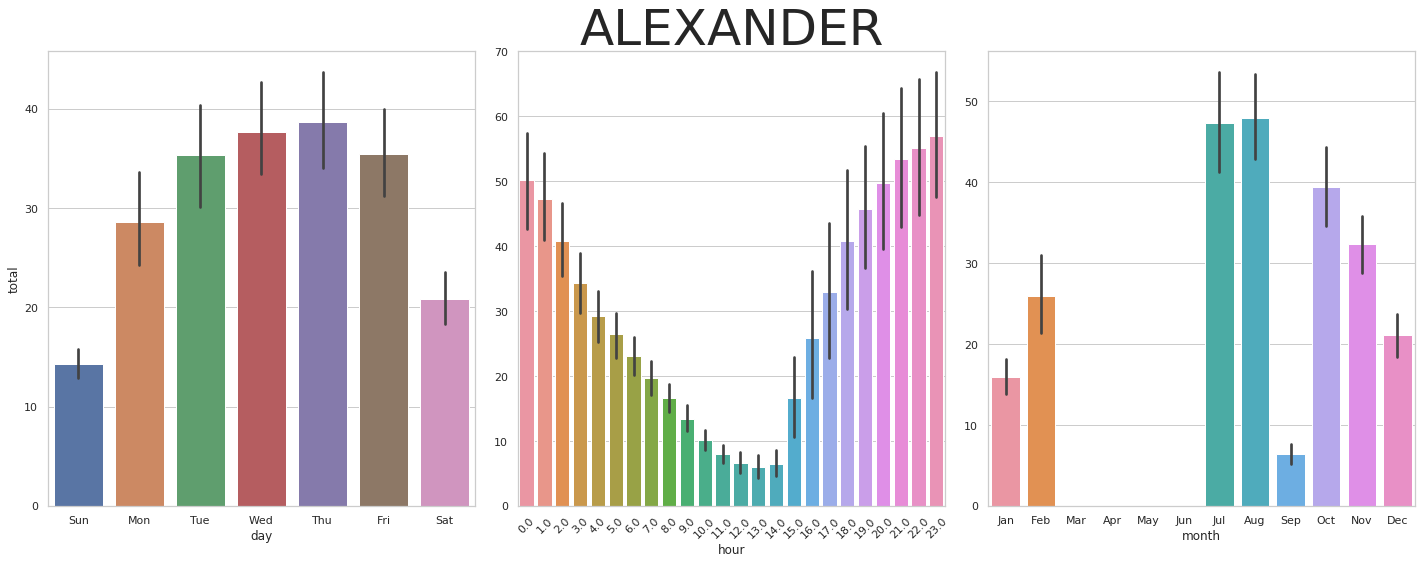

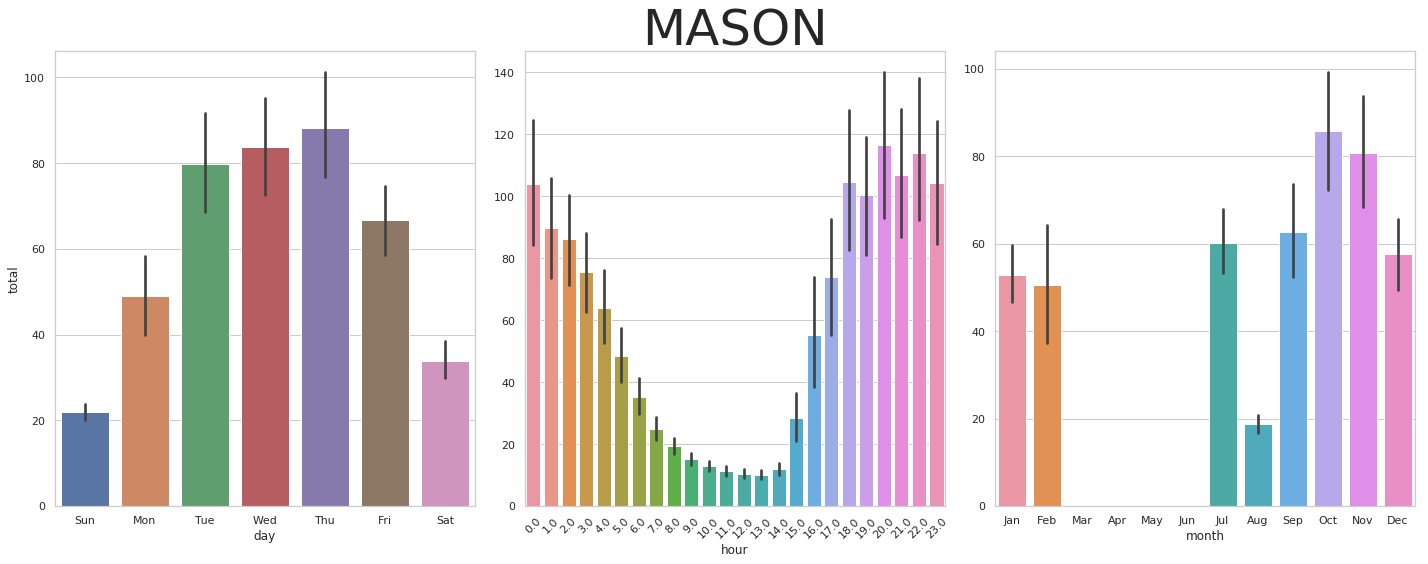

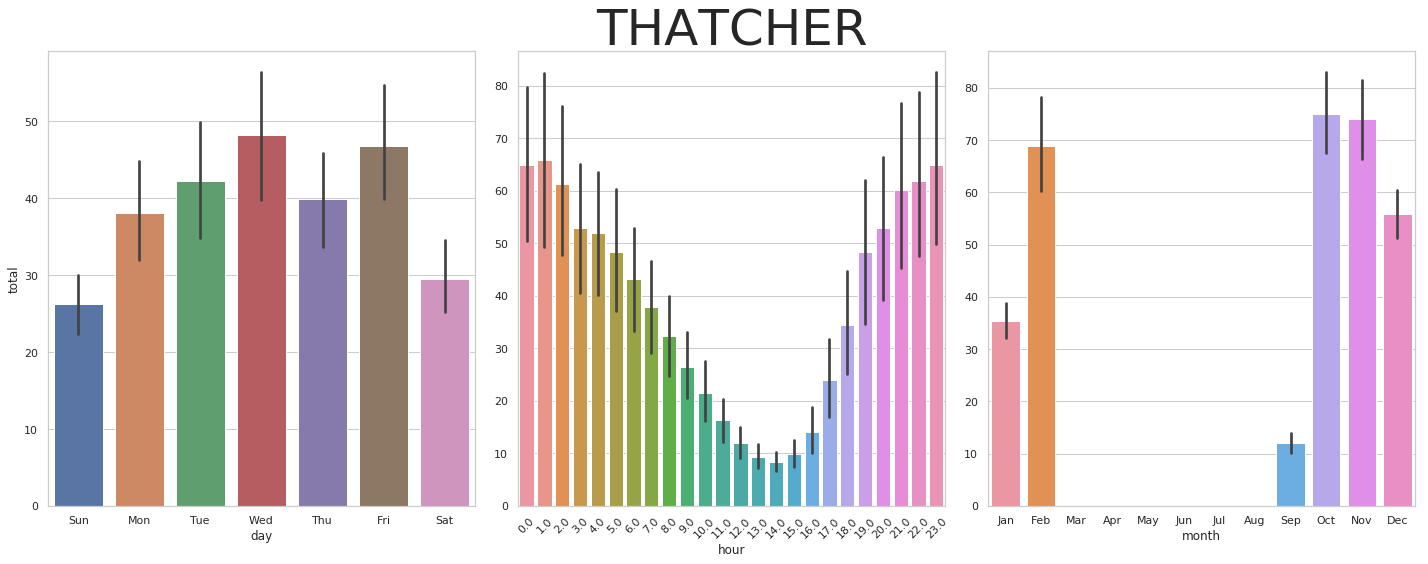

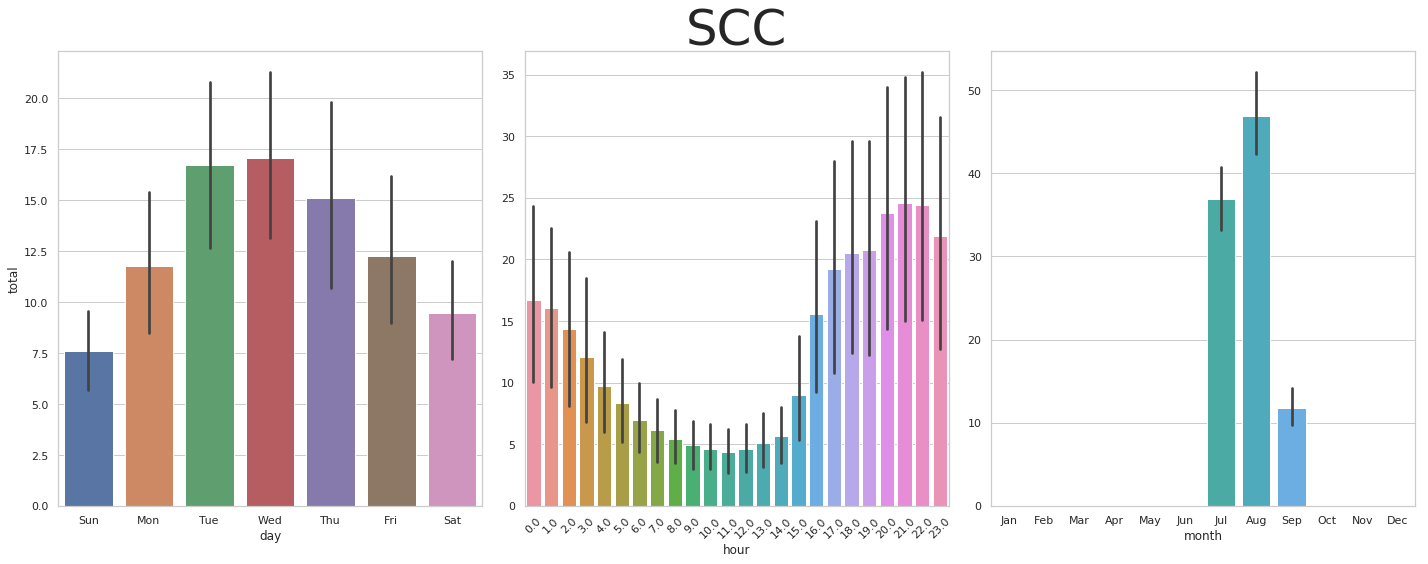

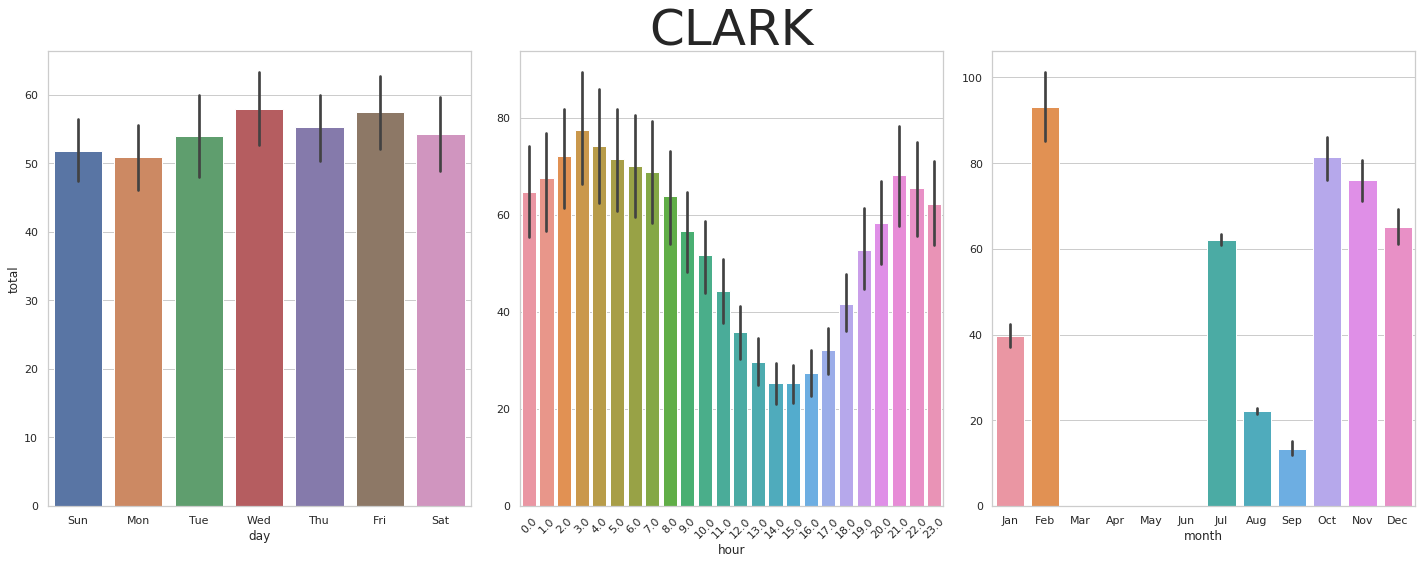

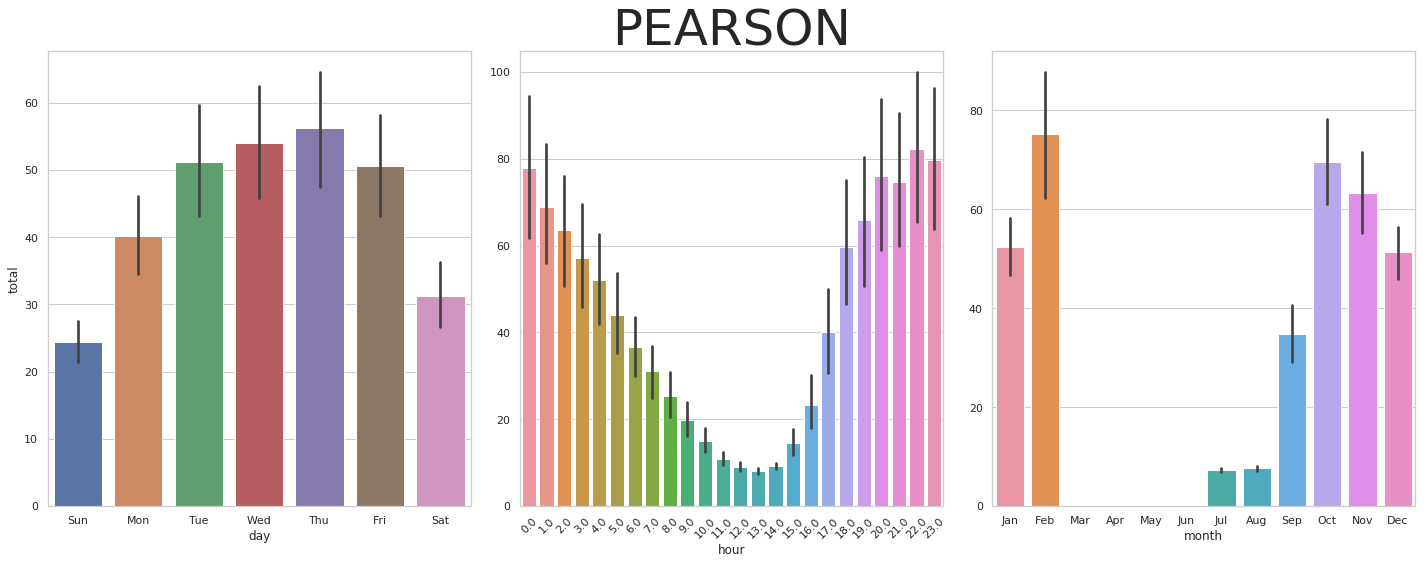

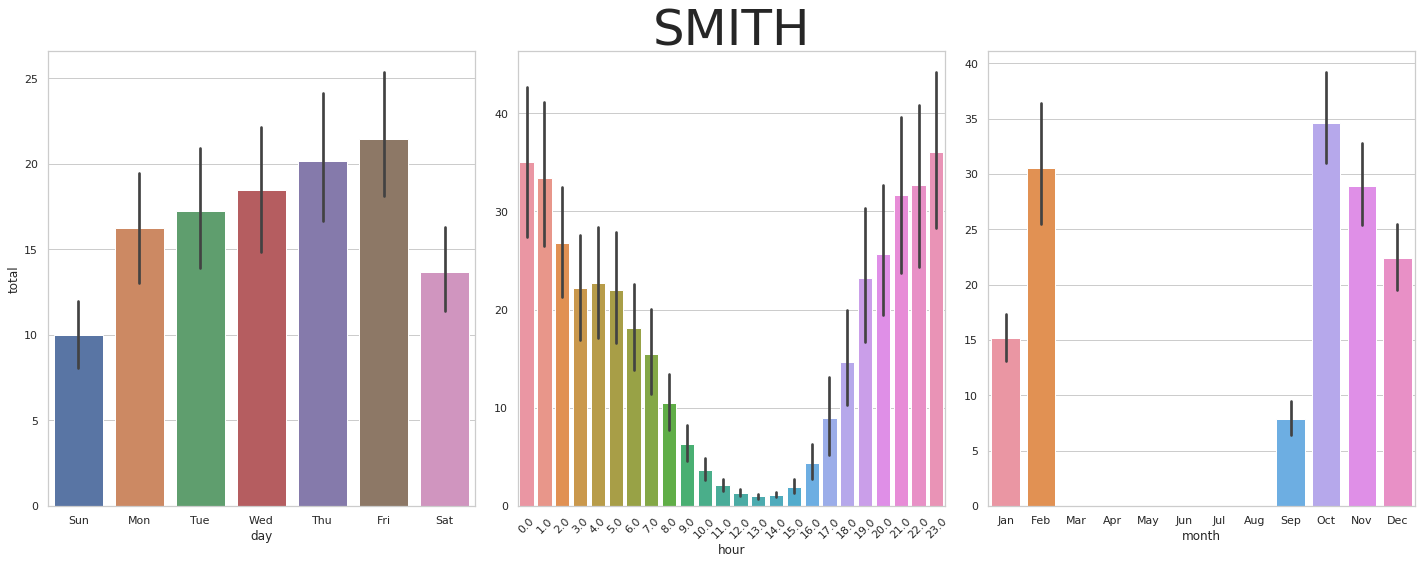

In [43]:
#all_buildings = [
#    'ALEXANDER','ANDREW','BALDWIN','BRACKETT','BRIDGES','CARNEGIE','CLARK', 'CROOKSHANK',
#    'DRAPER', 'FARM', 'FRANK', 'FRARY', 'GIBONEY', 'GIBSON', 'GROUNDS', 'HAHN', 'HALDEMAN',
#    'HARWOOD','ITB', 'KENYON', 'LAWRY', 'LEB', 'LEBUS', 'MASON', 'MCCARTHY', 'MERRIT',
#    'MILLIKAN', 'MUSEUM', 'NORTON', 'OLDENBORG','PAULEY','PEARSON','PENDLETON','POMONA''
#    'RAINS','REMBRANDT', 'SCC', 'SEAVER','SGM','SMILEY','SMITH','SONTAG','STUDIOART',
#    'SUMNER','THATCHER','WALKER','WALTON','WIG'
#]
building_list = ['ALEXANDER','CARNEGIE','CROOKSHANK','MASON','THATCHER','SCC','CLARK','PEARSON','SMITH']


for bui in building_list:
    get_building_df(bui,wifi_df)



In [2]:
"""
# Get data from csv  file; Try not to modify it!!!
wifi_df = pd.read_csv('wifi_data_until_20190204.csv',
                      infer_datetime_format=True,
                      index_col=False)
"""

In [3]:
"""
# Get list of APs for multiple buildings
#building_list = ['ALEXANDER','MASON','THATCHER','SCC','CLARK','PEARSON','SMITH']

# Get list of APs for a buildings
building_name = 'MASON'
building_ap = get_building_accesspoints(wifi_df.columns, building_name)

# Create a Dataframe to help shape the final dataframe
building_df = pd.DataFrame(columns = ['month','day','hour','total']+building_ap)
"""

In [4]:
"""
# Populate building_df
building_df['month'] = pd.to_datetime(
    wifi_df['time'],
    infer_datetime_format=True,
    utc=True
).dt.strftime('%b')#.astype(np.float) #%m

building_df['day'] = pd.to_datetime(
    wifi_df['time'],
    infer_datetime_format=True,
    utc=True
).dt.strftime('%a')#.astype(np.float) #%w

building_df['hour'] = pd.to_datetime(
    wifi_df['time'],
    infer_datetime_format=True,
    utc=True
).dt.strftime('%H').astype(np.float)

building_df[building_ap] = wifi_df[building_ap].fillna(0)

building_df['total'] = building_df[building_ap].sum(axis=1)
"""

In [5]:
"""
# Apply Multiple indexes in datafram
building_df_by_all = building_df.groupby(['month','day','hour']).mean()
#print(list(building_df_by_day_and_hour['total']))
"""

In [8]:
"""
# Creates an empty DataFrame foor scatterplot
final_df = pd.DataFrame(
    columns = ['month','day','hour','building_name','average_total']
)

final_df['month'] = building_df_by_all.index.get_level_values(0)
final_df['day'] = building_df_by_all.index.get_level_values(1)
final_df['hour'] = building_df_by_all.index.get_level_values(2)
final_df['building_name'] = [building_name]*len(final_df['month'])
final_df['total'] = list(building_df_by_all['total'])

#print(final_df)
"""

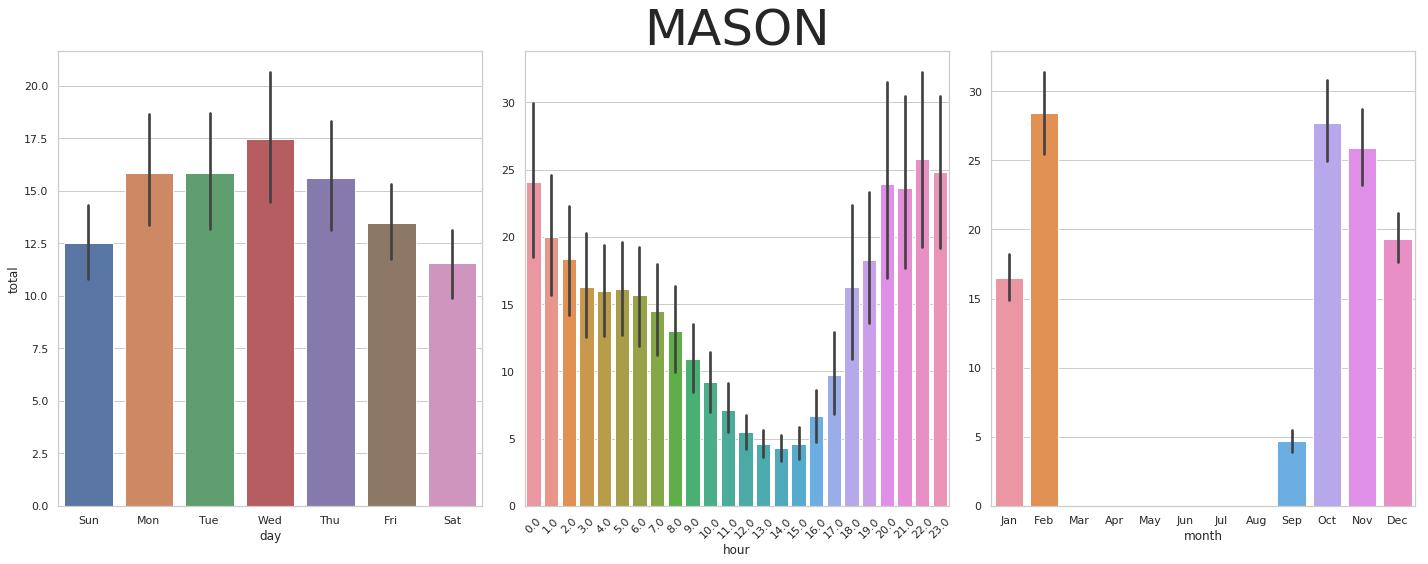

In [20]:
"""
# Lists to help order plots
order_day = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
order_mon = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep","Oct","Nov","Dec"]



# Create 1x3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,8))

ax2.set_title(building_name,fontsize=50) #################

sns.barplot(x="day", y="total", data=final_df, ax=ax1, order=order_day)

sns.barplot(x="hour", y="total", data=final_df, ax=ax2)
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.set_ylabel("")  # remove y label, but keep ticks

sns.barplot(x="month", y="total", data=final_df, ax=ax3, order=order_mon)
ax3.set_ylabel("")  # remove y label, but keep ticks

fig.tight_layout()

plt.show()
"""
